# Dependencies

In [1]:
import os
import matplotlib.pyplot as plt

from datacollect import SimData, MirexData, get_layer_from_height

# Input parameters

In [2]:
# Dataset
year = 2018

# Input Dir (Simulations)
path_simulation = f'/Users/kristianboerger/working_files/ledsa/simulation/{year}'
# Input Dir (MIREX)
path_mirex = '/Users/kristianboerger/working_files/ledsa/MIREX'

# Experimental Data

experiment = 'V004' # relevant for MIREX data
simulation_uc = 'V004' # relevant for simulation data
simulation_cc = 'V004_cc' # relevant for simulation data

# Output Path
# path_output = '/home/kboerger/ledsa/analysis/plots'

# Get data

In [3]:
path_uc = os.path.join(path_simulation, simulation_uc, 'Cam_01')
path_cc = os.path.join(path_simulation, simulation_cc, 'Cam_01')
mirex_file = os.path.join(path_mirex, f'{year}_{experiment}.dat')

sim_uc = SimData(path_uc)
sim_cc = SimData(path_cc)
mirex_data = MirexData(mirex_file)

# LED intensities uncorrected (uc) vs color corrected (cc)

Text(0.5, 0, 'time [s]')

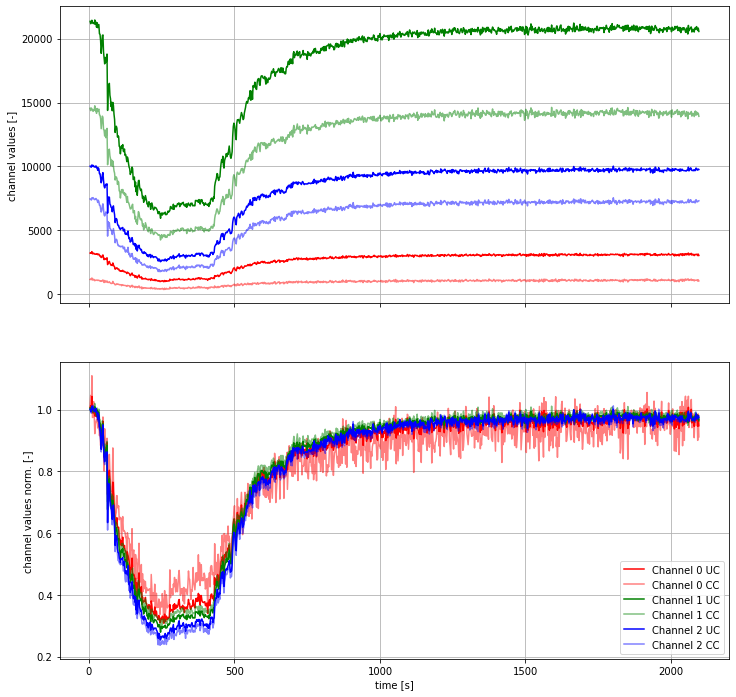

In [4]:
line = 3
channel_list = [0,1,2]
color_list = ['red', 'green', 'blue']

led_id = 20

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 12))
for channel, color in zip(channel_list, color_list):
    led_params_uc = sim_uc.get_ledparams_at_line(channel,line,'sum_col_val', n_ref=False)
    led_params_cc = sim_cc.get_ledparams_at_line(channel,line,'sum_col_val_cc', n_ref=False)
    led_params_uc_norm = sim_uc.get_ledparams_at_line(channel,line,'sum_col_val', n_ref=10)
    led_params_cc_norm = sim_cc.get_ledparams_at_line(channel,line,'sum_col_val_cc', n_ref=10)
    ax1.plot(led_params_uc[led_id], color=color)
    ax1.plot(led_params_cc[led_id], color=color, alpha=0.5)
    ax2.plot(led_params_uc_norm[led_id], color=color, label=f"Channel {channel} UC")
    ax2.plot(led_params_cc_norm[led_id], color=color, alpha=0.5, label=f"Channel {channel} CC")

ax1.grid(True)
ax2.grid(True)
ax2.legend(loc='best')
ax1.set_ylabel("channel values [-]")
ax2.set_ylabel("channel values norm. [-]")
plt.xlabel("time [s]")


# Extinction coefficients uncorrected (uc) vs color corrected (cc)

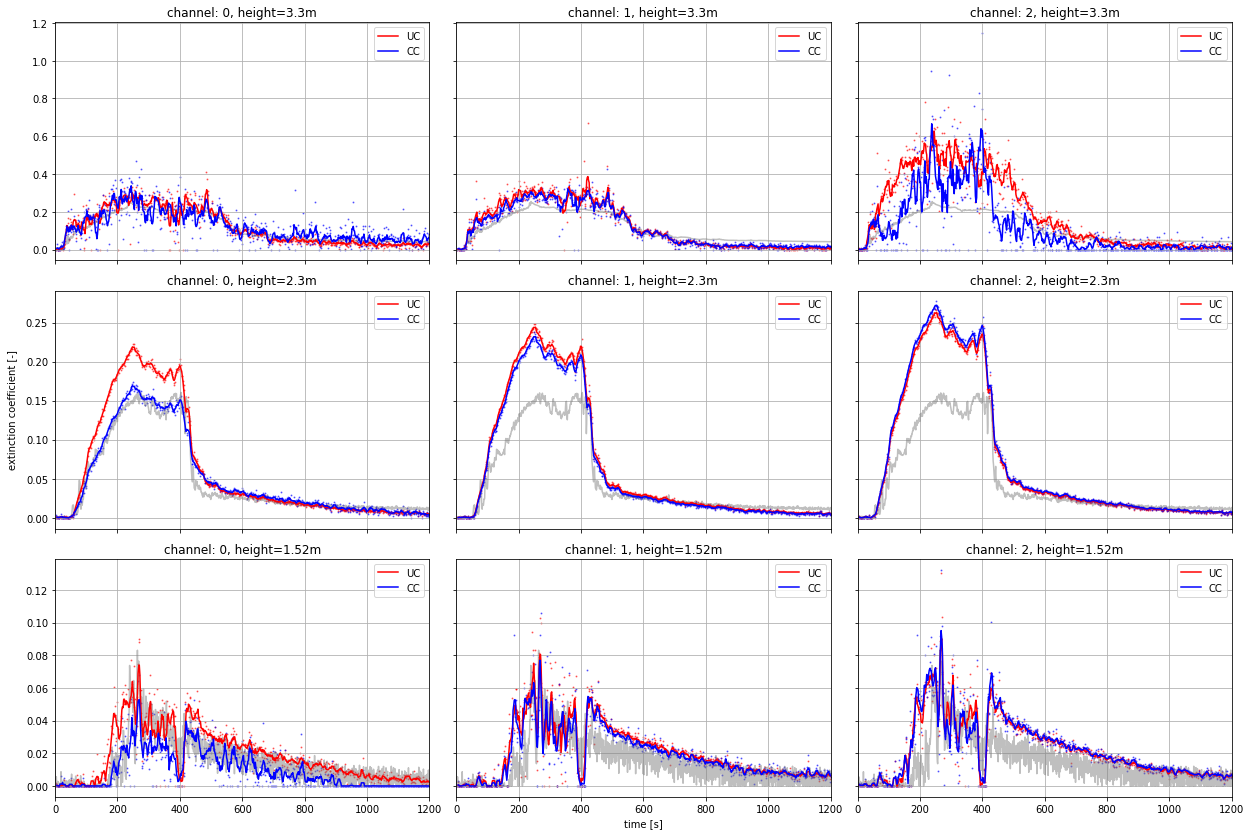

In [5]:
line = 3
channel_list = [0,1,2]
height_list = [3.3,2.3,1.52]
# mirex_data.set_window(10)
mirex_list = [mirex_data.mirex_1, mirex_data.mirex_2, mirex_data.mirex_3]
window = 5

min_time = 0
max_time = 1200
y_lim_list = [6,1,1]
n_rows = len(height_list)
n_cols = len(channel_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey="row", figsize=(18, 12))
for ax, height, mirex, y_lim in zip(axs, height_list, mirex_list, y_lim_list):
    for channel in channel_list:
        layer = get_layer_from_height(1, 3.35, height, 20)
        extco_uc = sim_uc.get_extco_at_layer(channel,layer, window)
        extco_uc_org = sim_uc.get_extco_at_layer(channel,layer, 1)
        extco_cc = sim_cc.get_extco_at_layer(channel,layer, window)
        extco_cc_org = sim_cc.get_extco_at_layer(channel,layer, 1)

        ax[channel].plot(mirex, color='gray', alpha=0.5)
        ax[channel].plot(extco_uc.index,extco_uc[f'{line}'], color='red', label="UC")
        ax[channel].scatter(extco_uc_org.index, extco_uc_org[f'{line}'], color='red', s=1, alpha=0.5)
        ax[channel].plot(extco_cc[f'{line}'], color='blue',label="CC")
        ax[channel].scatter(extco_cc_org.index, extco_cc_org[f'{line}'], color='blue', s=1, alpha=0.5)
        ax[channel].grid(True)
        ax[channel].set_xlim(min_time, max_time)
        ax[channel].set_title(f"channel: {channel}, height={height}m")
        ax[channel].legend(loc='upper right')
        # ax[channel].axvline(x=250, color='green')
        # ax[channel].set_ylim(0,y_lim)

fig.add_subplot(111, frameon=False)
# fig.suptitle(f"TF{tf}, {simulation}_Cam_{cam}, LED line: {line}")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("time [s]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()

# plot_name = os.path.join(path_output, f'{year}_{simulation}_Cam_{cam}_line_{line}_extco.pdf')
# plt.savefig(plot_name)


# Channel relations

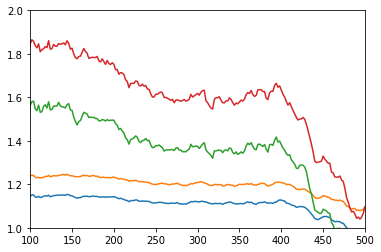

(1.0, 1.3)

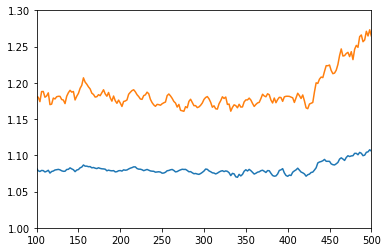

In [30]:
window = 5
line = 3
layer = 8

extco_uc_ch_0 = sim_uc.get_extco_at_layer(0, layer, window)
extco_uc_ch_1 = sim_uc.get_extco_at_layer(1, layer, window)
extco_uc_ch_2 = sim_uc.get_extco_at_layer(2, layer, window)

extco_cc_ch_0 = sim_cc.get_extco_at_layer(0, layer, window)
extco_cc_ch_1 = sim_cc.get_extco_at_layer(1, layer, window)
extco_cc_ch_2 = sim_cc.get_extco_at_layer(2, layer, window)

rel_1_0_uc = extco_uc_ch_1[f'{line}']/extco_uc_ch_0[f'{line}']
rel_2_0_uc = extco_uc_ch_2[f'{line}']/extco_uc_ch_0[f'{line}']

rel_1_0_cc = extco_cc_ch_1[f'{line}']/extco_cc_ch_0[f'{line}']
rel_2_0_cc = extco_cc_ch_2[f'{line}']/extco_cc_ch_0[f'{line}']

plt.plot(rel_1_0_uc)
plt.plot(rel_2_0_uc)
plt.plot(rel_1_0_cc)
plt.plot(rel_2_0_cc)
plt.xlim(100,500)
plt.ylim(1,2)
plt.show()
plt.plot(rel_2_0_uc/rel_1_0_uc)
plt.plot(rel_2_0_cc/rel_1_0_cc)
plt.xlim(100,500)
plt.ylim(1,1.3)